In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as scs
%matplotlib inline 

In [2]:

          # converted # total
# group a  90           955
# group b  128          1045

A_converted = 90
A_total = 955
A_cr = A_converted / A_total
B_converted = 128
B_total = 1045
B_cr = B_converted / B_total

Text(0,0.5,'probability')

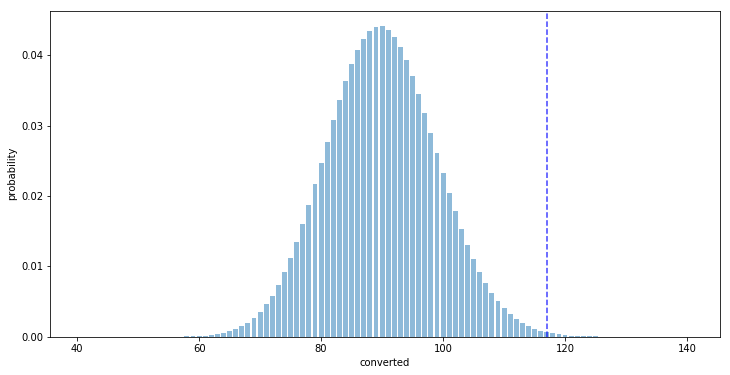

In [3]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(A_converted-49, A_converted+50, 100)
y = scs.binom(A_total, A_cr).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=B_cr * A_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')

Text(0,0.5,'probability')

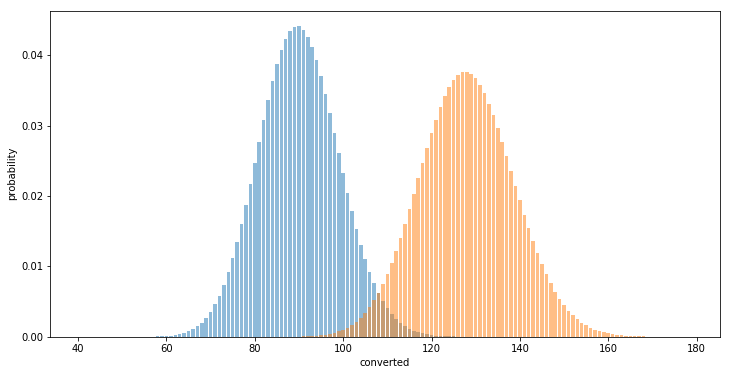

In [4]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(A_converted-49, A_converted+50, 100)
yA = scs.binom(A_total, A_cr).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
xB = np.linspace(B_converted-49, B_converted+50, 100)
yB = scs.binom(B_total, B_cr).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('converted')
plt.ylabel('probability')

Text(0,0.5,'PDF')

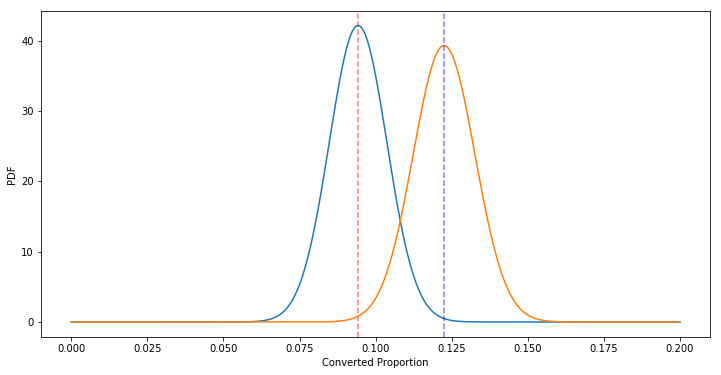

In [5]:
p_A = A_cr
p_B = B_cr
SE_A = np.sqrt(p_A * (1-p_A)) / np.sqrt(A_total)
SE_B = np.sqrt(p_B * (1-p_B)) / np.sqrt(B_total)
# plot the null and alternative hypothesis
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(0, .2, 1000)
yA = scs.norm(p_A, SE_A).pdf(xA)
ax.plot(xA, yA)
ax.axvline(x=p_A, c='red', alpha=0.5, linestyle='--')
xB = np.linspace(0, .2, 1000)
yB = scs.norm(p_B, SE_B).pdf(xB)
ax.plot(xB, yB)
ax.axvline(x=p_B, c='blue', alpha=0.5, linestyle='--')
plt.xlabel('Converted Proportion')
plt.ylabel('PDF')

In [6]:
print(scs.norm(p_A, SE_A))
print(p_A)
print(SE_A)
print(p_B)
print(SE_B)

0.09424083769633508
0.009454188368298757
0.12248803827751197
0.010141804089882087


In [24]:
import os
os.getcwd()

'/Users/laibohan/Desktop/ab_testing_formula'

In [18]:
os.chdir ('/Users/laibohan/Desktop/ab_testing_formula')

In [21]:
from stats_plot import *
from plot import *

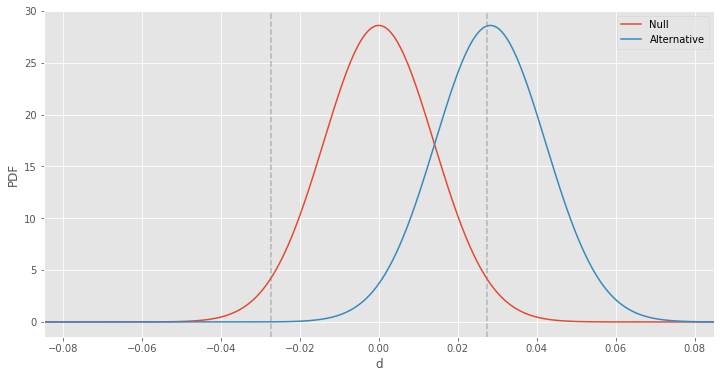

In [30]:

bcr = p_A  
d_hat = p_B - p_A
abplot(A_total,B_total,bcr, d_hat)



Define a function to calculate the minimum sample size
"Basic Conversion Rate" & "Minimum detectable effect" are two important paramater to decide the size

In [22]:
import scipy.stats as scs

def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
    References:
        Stanford lecture on sample sizes
        http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
    """
    # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N

import scipy.stats as st
>>> st.norm.ppf(.95)
1.6448536269514722
>>> st.norm.cdf(1.64)
0.94949741652589625

In [23]:
min_sample_size(bcr=0.10, mde=0.02)

3842.026629963879

0.09424083769633508
0.028247200581176884


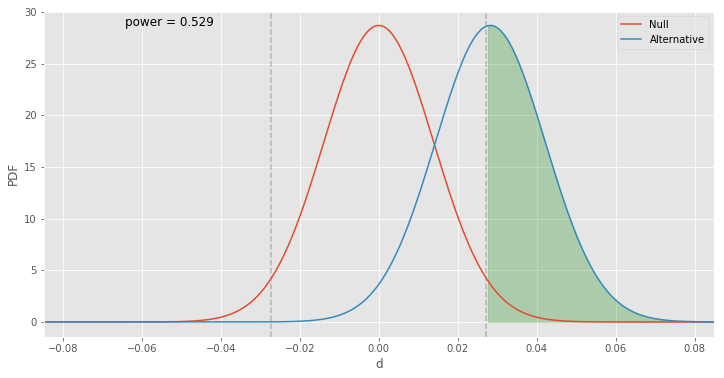

In [34]:
print(bcr)
print(d_hat)
abplot(1000, 1000, bcr, d_hat, show_power=True)

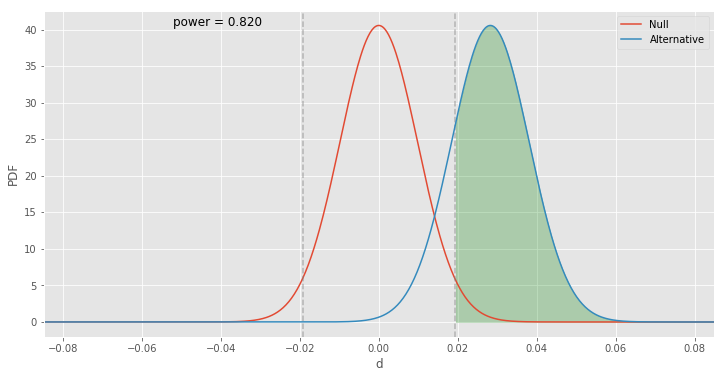

In [35]:
abplot(2000, 2000, bcr, d_hat, show_power=True)

Let's have an example regarding the webstore campaign

There are three different metrics we can use in this analysis:

Gross Coversion = enrolled / clicks

Retention = paid / enrolled

Net Coversion = paid / clicks

Following are the baseline summary for our experiment


In [36]:
baseline = {"Cookies":40000,"Clicks":3200,"Enrollments":660,"CTP":0.08,"GConversion":0.20625,
           "Retention":0.53,"NConversion":0.109313}

## Minimum detect change

Gross Conversion	enrolled/Cl =>	0.01	

Retention	paid/enrolled	=> 0.01	

Net Conversion	paid/Cl	=> 0.0075	

In [37]:
baseline["Cookies"] = 5000
baseline["Clicks"]=baseline["Clicks"]*(5000/40000)
baseline["Enrollments"]=baseline["Enrollments"]*(5000/40000)
baseline

{'CTP': 0.08,
 'Clicks': 400.0,
 'Cookies': 5000,
 'Enrollments': 82.5,
 'GConversion': 0.20625,
 'NConversion': 0.109313,
 'Retention': 0.53}

#### sd = sqrt(p*(1-p)/n)

p = probability
n = sample

In [41]:
#calculate the gross conversion : enroll/clicks
import math as mt
GC={}
GC["d_min"]=0.01
GC["p"]=baseline["GConversion"]
#p is given in this case - or we could calculate it from enrollments/clicks
GC["n"]=baseline["Clicks"]
GC["sd"]=round(mt.sqrt((GC["p"]*(1-GC["p"]))/GC["n"]),4)
GC["sd"]

0.0202

In [42]:
#calculate the retention : paid/enroll
R={}
R["d_min"]=0.01
R["p"]=baseline["Retention"]
R["n"]=baseline["Enrollments"]
R["sd"]=round(mt.sqrt((R["p"]*(1-R["p"]))/R["n"]),4)
R["sd"]

0.0549

In [43]:
#calculate the net conversion : paid/clicks
NC={}
NC["d_min"]=0.0075
NC["p"]=baseline["NConversion"]
NC["n"]=baseline["Clicks"]
NC["sd"]=round(mt.sqrt((NC["p"]*(1-NC["p"]))/NC["n"]),4)
NC["sd"]

0.0156

### Calculate the minimum sample size by base rate and minimum detec effect

In [49]:
GC["sample"]=min_sample_size(bcr=GC["p"], mde=GC["d_min"])
GC["sample"]
# we need 26156 per clicks 

26156.14643722664

In [112]:
#if we use 0.08 as a ctp and control group & experiment group
GC["sample"] = GC["sample"]/0.08*2
GC["sample"]
#page views

16347591.523266647

In [55]:
R["sample"]=min_sample_size(bcr=R["p"], mde=R["d_min"])
R["sample"] = R["sample"]/0.08/0.20625*2
R["sample"]
# This number is too big, perhaps we should drop this metric

4733588.014333804

In [52]:
NC["sample"]=min_sample_size(bcr=NC["p"], mde=NC["d_min"])
NC["sample"] = NC["sample"]/0.08*2
NC["sample"]

699630.009399952

### Let's analyze the data

In [23]:
control=pd.read_csv("AB_TESTING/control_data.csv")
experiment=pd.read_csv("AB_TESTING/experiment_data.csv")
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [114]:
pageviews_cont=control['Pageviews'].sum()
pageviews_exp=experiment['Pageviews'].sum()
pageviews_total=pageviews_cont+pageviews_exp
print ("number of pageviews in control:", pageviews_cont)
print ("number of Pageviews in experiment:" ,pageviews_exp)

number of pageviews in control: 345543
number of Pageviews in experiment: 344660


Examine the collective data to make sure we get the balance data

In [60]:
from scipy.stats import norm
def get_z_score(alpha):
    return norm.ppf(alpha)

In [61]:
p=0.5
alpha=0.05
p_hat=round(pageviews_cont/(pageviews_total),4)
sd=mt.sqrt(p*(1-p)/(pageviews_total))
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4988 and 0.5012 ; Is 0.5006 inside this range?


In [62]:
clicks_cont=control['Clicks'].sum()
clicks_exp=experiment['Clicks'].sum()
clicks_total=clicks_cont+clicks_exp

p_hat=round(clicks_cont/clicks_total,4)
sd=mt.sqrt(p*(1-p)/clicks_total)
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4959 and 0.5041 ; Is 0.5005 inside this range?


In [63]:
ctp_cont=clicks_cont/pageviews_cont
ctp_exp=clicks_exp/pageviews_exp
d_hat=round(ctp_exp-ctp_cont,4)
p_pooled=clicks_total/pageviews_total
sd_pooled=mt.sqrt(p_pooled*(1-p_pooled)*(1/pageviews_cont+1/pageviews_exp))
ME=round(get_z_score(1-(alpha/2))*sd_pooled,4)
print ("The confidence interval is between",0-ME,"and",0+ME,"; Is",d_hat,"within this range?")

The confidence interval is between -0.0013 and 0.0013 ; Is 0.0001 within this range?


In [67]:
clicks_cont=control["Clicks"].loc[control["Enrollments"].notnull()].sum()
clicks_exp=experiment["Clicks"].loc[experiment["Enrollments"].notnull()].sum()
print(clicks_cont)
print(clicks_exp)

17293
17260


Gross conversion = enrollments/clicks

In [68]:
enrollments_cont=control["Enrollments"].sum()
enrollments_exp=experiment["Enrollments"].sum()

GC_cont=enrollments_cont/clicks_cont
GC_exp=enrollments_exp/clicks_exp
GC_pooled=(enrollments_cont+enrollments_exp)/(clicks_cont+clicks_exp)
GC_sd_pooled=mt.sqrt(GC_pooled*(1-GC_pooled)*(1/clicks_cont+1/clicks_exp))
GC_ME=round(get_z_score(1-alpha/2)*GC_sd_pooled,4)
GC_diff=round(GC_exp-GC_cont,4)
print("The change due to the experiment is",GC_diff*100,"%")
print("Confidence Interval: [",GC_diff-GC_ME,",",GC_diff+GC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",-GC["d_min"],"is not in the CI as well.")

The change due to the experiment is -2.06 %
Confidence Interval: [ -0.0292 , -0.012 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if -0.01 is not in the CI as well.


Net Conversion = payment/clicks

In [69]:
payments_cont=control["Payments"].sum()
payments_exp=experiment["Payments"].sum()

NC_cont=payments_cont/clicks_cont
NC_exp=payments_exp/clicks_exp
NC_pooled=(payments_cont+payments_exp)/(clicks_cont+clicks_exp)
NC_sd_pooled=mt.sqrt(NC_pooled*(1-NC_pooled)*(1/clicks_cont+1/clicks_exp))
NC_ME=round(get_z_score(1-alpha/2)*NC_sd_pooled,4)
NC_diff=round(NC_exp-NC_cont,4)
print("The change due to the experiment is",NC_diff*100,"%")
print("Confidence Interval: [",NC_diff-NC_ME,",",NC_diff+NC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",NC["d_min"],"is not in the CI as well.")

The change due to the experiment is -0.49 %
Confidence Interval: [ -0.0116 , 0.0018000000000000004 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if 0.0075 is not in the CI as well.


##The Sign Test

The Sign Test is the simplest nonparametric test for matched or paired data. 
The approach is to analyze only the signs of the difference scores, as shown below:

In [70]:
full=control.join(other=experiment,how="inner",lsuffix="_cont",rsuffix="_exp")

In [78]:
display(full.head())
full.shape

,Date_cont,Pageviews_cont,Clicks_cont,Enrollments_cont,Payments_cont,Date_exp,Pageviews_exp,Clicks_exp,Enrollments_exp,Payments_exp
0,"Sat, Oct 11",7723,687,134.0,70.0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9102,779,147.0,70.0,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10511,909,167.0,95.0,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9871,836,156.0,105.0,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",10014,837,163.0,64.0,"Wed, Oct 15",9793,832,140.0,94.0


(37, 10)

In [72]:
full.count()

Date_cont           37
Pageviews_cont      37
Clicks_cont         37
Enrollments_cont    23
Payments_cont       23
Date_exp            37
Pageviews_exp       37
Clicks_exp          37
Enrollments_exp     23
Payments_exp        23
dtype: int64

In [83]:
full = full.loc[full["Enrollments_cont"].notnull()]
full.shape

(23, 10)

Given a sign for GC & NC

In [86]:
a1=full["Enrollments_cont"]/full["Clicks_cont"]
a2=full["Enrollments_exp"]/full["Clicks_exp"]
#when experiment group is better than control group
full["GC"]= np.where(a2>a1,1,0)

In [87]:
b1=full["Payments_cont"]/full["Clicks_cont"]
b2=full["Payments_exp"]/full["Clicks_exp"]
#when experiment group is better than control group
full["NC"]= np.where(b2>b1,1,0)

In [88]:
full.head()

,Date_cont,Pageviews_cont,Clicks_cont,Enrollments_cont,Payments_cont,Date_exp,Pageviews_exp,Clicks_exp,Enrollments_exp,Payments_exp,GC,NC
0,"Sat, Oct 11",7723,687,134.0,70.0,"Sat, Oct 11",7716,686,105.0,34.0,0,0
1,"Sun, Oct 12",9102,779,147.0,70.0,"Sun, Oct 12",9288,785,116.0,91.0,0,1
2,"Mon, Oct 13",10511,909,167.0,95.0,"Mon, Oct 13",10480,884,145.0,79.0,0,0
3,"Tue, Oct 14",9871,836,156.0,105.0,"Tue, Oct 14",9867,827,138.0,92.0,0,0
4,"Wed, Oct 15",10014,837,163.0,64.0,"Wed, Oct 15",9793,832,140.0,94.0,0,1


In [95]:
gc=full["GC"].sum()
nc=full["NC"].sum()
n=full["NC"].count()
print("No. of cases for GC:",full["GC"].sum(),'\n',
      "No. of cases for NC:",full["NC"].sum(),'\n',
      "No. of total cases",full["NC"].count())

No. of cases for GC: 4 
 No. of cases for NC: 10 
 No. of total cases 23


Recall that a p-value is the probability of observing a test statistic as or more extreme than that observed. We observed 2 negative signs. Thus, the p-value for the test is: p-value = P(x < 2). Using the table above,

get_probs = n!/x!(n-x)!*p**x*(1-p)**(n-x)

get_2side_pvalue = p(x<=2) = p(0) + p(1) + p(2)

In [96]:

def get_prob(x,n):
    p=round(mt.factorial(n)/(mt.factorial(x)*mt.factorial(n-x))*0.5**x*0.5**(n-x),4)
    return p
#next a function to compute the pvalue from probabilities of maximum x
def get_2side_pvalue(x,n):
    p=0
    for i in range(0,x+1):
        p=p+get_prob(i,n)
    return 2*p

In [111]:
success=[]
success_prob=[]
for i in range(0,24):
    success.append(i)
    success_prob.append(get_prob(i,23))

success_pd = pd.DataFrame(list(zip(success,success_prob)),columns=["success","success_prob"])
display(success_pd)


,success,success_prob
0,0,0.0000
1,1,0.0000
2,2,0.0000
3,3,0.0002
4,4,0.0011
5,5,0.0040
6,6,0.0120
7,7,0.0292
8,8,0.0584
9,9,0.0974


In [97]:
print ("GC Change is significant if",get_2side_pvalue(gc,n),"is smaller than 0.05")
print ("NC Change is significant if",get_2side_pvalue(nc,n),"is smaller than 0.05")

GC Change is significant if 0.0026000000000000003 is smaller than 0.05
NC Change is significant if 0.6774 is smaller than 0.05
